# Upload the files

In [ ]:
from google.colab import files
files.upload()

Saving words.pickle to words.pickle


{'words.pickle': b'\x80\x04\x95\x05\x00\x01\x00\x00\x00\x00\x00\x8f\x94(\x8c\x03910\x94\x8c\x10myhealthmyiredel\x94\x8c\x06munich\x94\x8c\x10digitalyouthwork\x94\x8c\x08cranston\x94\x8c\x07mailman\x94\x8c\x06glycol\x94\x8c\x05fewer\x94\x8c\x07phone\xc3\xa2\x94\x8c\x06devgan\x94\x8c\x07ketamin\x94\x8c\tomeprazol\x94\x8c\x03vot\x94\x8c\x07fashwir\x94\x8c\nmasterplan\x94\x8c\x12coronavirusnigeria\x94\x8c\x07vermont\x94\x8c\x05abe\xc3\xa2\x94\x8c\x10highdosevitaminc\x94\x8c\x05who\'v\x94\x8c\tgreenland\x94\x8c\x05stall\x94\x8c\x04duck\x94\x8c\x07retreat\x94\x8c\x03bag\x94\x8c\x06hassan\x94\x8c\x05bulan\x94\x8c\x04plan\x94\x8c\x0binitially\xc3\xa2\x94\x8c\x05seven\x94\x8c\x073155619\x94\x8c\x04appt\x94\x8c\x0egastrointestin\x94\x8c\x06grappl\x94\x8c\x03hei\x94\x8c\racetaminophen\x94\x8c\x05luhut\x94\x8c\x05sudan\x94\x8c\x03590\x94\x8c\x0bstayhealthi\x94\x8c\x0417th\x94\x8c\x0fstayhomestayupd\x94\x8c\x03mlc\x94\x8c\x05wiley\x94\x8c\x08calabria\x94\x8c\x05femal\x94\x8c\x05soars\x94\x8c\x04pa\

# Import the libraries

In [ ]:
import re
import string
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

import wandb
from wandb.keras import WandbCallback

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import activations
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot, hashing_trick, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Activation, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dropout
from keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# from utils import load_data, preprocessing, confusion_matrix_plot, evaluate, get_vocab_size, create_token2id, one_hot_text, get_verdict, get_verdict_with_token2id

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Loading data

In [ ]:
df = load_data('tweet_dataset_18000.csv')
df.head()

Shape of the dataset: (18000, 17)
Number of the 'REAL' label in the dataset: 9000
Number of the 'FAKE' label in the dataset: 9000


,Id,Date,Time,Text,Hashtags,Mentions,Urls,Author id,In reply to (user_id),Type,In response to (tweet_id),Retweet count,Like count,Possibly sensitive,Language,label,verdict
0,1.090000e+18,2/7/2019,11:29:48,Kogi state DSNO meeting is ongoing @kogipheoc ...,NaN,@kogipheoc,NaN,1.060000e+18,NaN,tweet,NaN,0,2,False,en,fake,0
1,1.190000e+18,10/22/2019,11:32:19,How true is this @ItsMutai\n#Nairobi\n#UnaiOut...,"Nairobi, UnaiOut, KOTLoyals",@itsmutai,NaN,2.221834e+09,NaN,tweet,NaN,0,2,False,en,fake,0
2,1.220000e+18,1/25/2020,23:08:10,A ‘High-Level Exercise’ Conducted 3 Months Ago...,NaN,@revelation1217,http://theeconomiccollapseblog.com/?p=16569,7.690000e+17,NaN,tweet,NaN,0,0,False,en,fake,0
3,1.220000e+18,1/30/2020,4:03:32,Coronavirus Bioweapon - How China Stole Corona...,NaN,NaN,https://greatgameindia.com/coronavirus-bioweapon/,2.620628e+08,NaN,tweet,NaN,1,1,False,en,fake,0
4,1.220000e+18,1/30/2020,20:23:58,Eugenicist Bill Gates co-hosted a “high-level ...,NaN,NaN,http://www.imusenvironmentalhealth.org/eugenic...,8.340000e+17,NaN,tweet,NaN,6,6,False,en,fake,0


# Getting the independet and dependent variables

In [ ]:
X = df.iloc[:, 3].values
y = df.iloc[:, 16].values

print("X: {}".format(X[0]))
print("y: {}".format(y[0]))

X: Kogi state DSNO meeting is ongoing @kogipheoc . The State epidemiologist, Dr. Austin Ojotule,  Dr. Ningi, from WHO and Mrs Ageni Deborah are facilitating. https://t.co/vs6KyOKjH8
y: 0


# Preprocessing

In [1]:
X_preproc = [preprocessing(i) for i in X]

# Splitting the data into training set and test set 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_preproc), y, test_size=0.2, random_state = 0)

print('x_train: {}'.format(X_train.shape))
print('x_test: {}'.format(X_test.shape))
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (14400,)
x_test: (3600,)
y_train: (14400,)
y_test: (3600,)


# **Part 1: Traditional machine learning**

In [2]:
cv = TfidfVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

## Model 1. Naive Bayes

In [ ]:
naive_bayes = MultinomialNB()

### Grid search

In [ ]:
parameters = [{'alpha': [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5], 'fit_prior': [True, False]}]

grid_search = GridSearchCV(estimator = naive_bayes,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 91.42 %
Best Parameters: {'alpha': 0.3, 'fit_prior': True}


### Training the model

In [ ]:
# Initializing the model
naive_bayes = MultinomialNB(alpha = 0.3)
# Fitting the data into the model
naive_bayes.fit(X_train_cv, y_train)
# Prediction
prediction = naive_bayes.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1785
           1       0.88      0.97      0.92      1815

    accuracy                           0.92      3600
   macro avg       0.92      0.92      0.92      3600
weighted avg       0.92      0.92      0.92      3600

Accuracy score: 0.9183333333333333
Precision score: 0.8808212318477716
Recall score: 0.9691460055096419


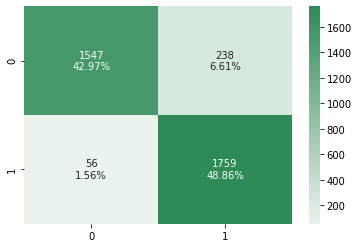

In [ ]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the model

In [ ]:
pkl_filename = "models/naive_bayes_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(naive_bayes, file)

## Model 2. Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(random_state = 0, max_iter=1000)

### Grid search

In [ ]:
parameters = [{'C': [0, 0.5, 1, 5, 10, 50, 100, 200, 500], 'penalty': ['l1', 'l2']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 92.31 %
Best Parameters: {'C': 0.5, 'penalty': 'l2'}


### Training the model

In [ ]:
# Initializing the model
logistic_regression = LogisticRegression(C=0.5, random_state = 0, max_iter=1000)
# Fitting the data into the model
logistic_regression=logistic_regression.fit(X_train_cv, y_train)
# Prediction
prediction = logistic_regression.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1785
           1       0.93      0.94      0.94      1815

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600

Accuracy score: 0.9361111111111111
Precision score: 0.9295392953929539
Recall score: 0.9449035812672176


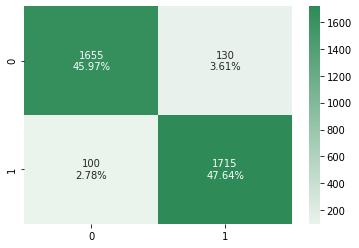

In [ ]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the model

In [ ]:
pkl_filename = "models/logistic_regression_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logistic_regression, file)

## Model 3. Support Vector Machine (SVM)

In [ ]:
svm = SVC(random_state = 0)

### Grid search

In [ ]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}]


grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

### Training the model

In [ ]:
# Initializing the model
svm = SVC(kernel = 'linear', random_state = 0)
# Fitting the data into the model
svm.fit(X_train_cv, y_train)
# Prediction
prediction = svm.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1785
           1       0.94      0.93      0.93      1815

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600

Accuracy score: 0.9327777777777778
Precision score: 0.9357340720221606
Recall score: 0.9305785123966942


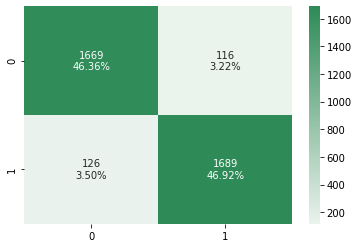

In [ ]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the model

In [ ]:
pkl_filename = "models/svm_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(svm, file)

## Model 4. Decision Tree

In [ ]:
decision_Tree = DecisionTreeClassifier()

### Grid search

In [ ]:
parameters = [{'criterion':['gini','entropy'], 'max_depth':[None, 1, 5, 10, 20, 50, 90, 100, 150], 'max_features':[None, 'sqrt', 'auto', 'log2'], 'min_samples_split':[1, 2, 5, 10, 20, 40], 'min_samples_leaf':[1, 2, 5, 10, 20,]}]

grid_search = GridSearchCV(estimator = decision_Tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 89.88 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 90, 'max_features': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


### Training the model

In [ ]:
# Initializing the model
decision_Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 90)
# Fitting the data into the model
decision_Tree.fit(X_train_cv, y_train)
# Prediction
prediction = decision_Tree.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1785
           1       0.92      0.91      0.91      1815

    accuracy                           0.91      3600
   macro avg       0.91      0.91      0.91      3600
weighted avg       0.91      0.91      0.91      3600

Accuracy score: 0.9144444444444444
Precision score: 0.9202453987730062
Recall score: 0.9090909090909091


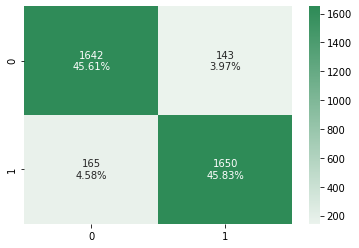

In [ ]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the model

In [ ]:
pkl_filename = "models/decision_Tree_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(decision_Tree, file)

# **Part 2: Ensemble learning**

## Model 5. Random forest

In [ ]:
random_forest = RandomForestClassifier( )

### Grid search

In [ ]:
parameters = [{'n_estimators':[10, 50, 100, 200, 500, 1000]}]

grid_search = GridSearchCV(estimator = random_forest,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search = grid_search.fit(X_train_cv, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Accuracy: 92.10 %
Best Parameters: {'n_estimators': 100}


### Training the model

In [ ]:
# Initializing the model
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
# Fitting the data into the model
random_forest.fit(X_train_cv, y_train)
# Prediction
prediction = random_forest.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1785
           1       0.89      0.98      0.93      1815

    accuracy                           0.93      3600
   macro avg       0.94      0.93      0.93      3600
weighted avg       0.94      0.93      0.93      3600

Accuracy score: 0.9311111111111111
Precision score: 0.8943130347257172
Recall score: 0.9790633608815427


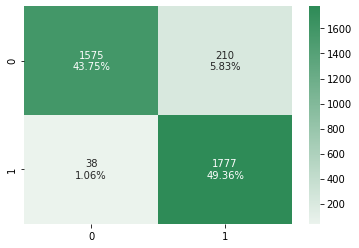

In [ ]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the final model

In [ ]:
pkl_filename = "models/random_forest_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(random_forest, file)

## Model 6. Stacking model

In [ ]:
estimators = [('naive bayes', naive_bayes),
              ('svm', svm),
              ('decision tree', decision_Tree)]

### Training the model

In [ ]:
# Initializing the model
Stacking = StackingClassifier(estimators=estimators, final_estimator=logistic_regression)
# Fitting the data into the model
Stacking.fit(X_train_cv, y_train)
# Prediction
prediction = Stacking.predict(X_test_cv)

### Evaluating the model

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1780
           1       0.95      0.96      0.95      1820

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Accuracy score: 0.9511111111111111
Precision score: 0.9482006543075245
Recall score: 0.9554945054945055


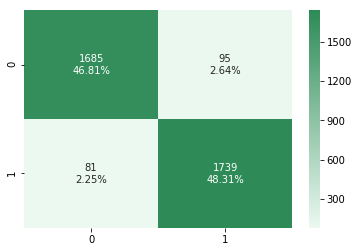

In [37]:
accuracy = evaluate(y_test, prediction)
confusion_matrix_plot(confusion_matrix(y_test, prediction))

### Save the final model

In [ ]:
pkl_filename = "models/stacking_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Stacking, file)

# **Part 3. Deep learning**

In [ ]:
with open('./words.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
_, max_token = get_vocab_size(list(X_train), list(X_test), [])
print('max_token: {}'.format(max_token))

max_token: 32


In [ ]:
onehot_train=[hashing_trick(words, round(len(tokenizer)*1.3), hash_function='md5') for words in X_train]
onehot_test=[hashing_trick(words, round(len(tokenizer)*1.3), hash_function='md5') for words in X_test]

train_embedded_docs=pad_sequences(onehot_train,padding='pre',maxlen=max_token)
test_embedded_docs=pad_sequences(onehot_test,padding='pre',maxlen=max_token)

X_train_final=np.array(train_embedded_docs)
X_test_final=np.array(test_embedded_docs)

y_train_final=np.array(y_train)
y_test_final=np.array(y_test)

## Model 7. LSTM

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 40)            1840000   
_________________________________________________________________
dropout (Dropout)            (None, 32, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,926,657
Trainable params: 1,926,657
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
225/225 [==============================] - 28s 115ms/step - loss: 0.5022 - accuracy: 0.7494 - val_loss: 0.2022 - val_accuracy: 0.9131

Epoch 00001: val_accuracy improved from -inf to 0.91306, saving model to ./saved_models/chec

epoch,10
loss,0.01029
accuracy,0.99701
val_loss,0.28416
val_accuracy,0.93389
_runtime,301
_timestamp,1615557934
_step,10
best_val_loss,0.16127
best_epoch,1


epoch,▁▂▂▃▄▅▅▆▇▇█
loss,█▄▂▂▁▁▁▁▁▁▁
accuracy,▁▆▇▇███████
val_loss,▃▁▁▂▄▄▅▇█▇▆
val_accuracy,▁▇█▇▆▆▆▆▅▅▆
_runtime,▁▂▃▃▄▅▅▆▇▇█
_timestamp,▁▂▃▃▄▅▅▆▇▇█
_step,▁▂▂▃▄▅▅▆▇▇█


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1785
           1       0.94      0.95      0.95      1815

    accuracy                           0.95      3600
   macro avg       0.95      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600

Accuracy score: 0.9469444444444445
Precision score: 0.9427480916030534
Recall score: 0.9526170798898072


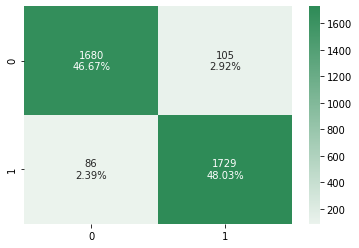

In [ ]:
clear_session()
wandb.init(project='fakenews_twitter_final', entity='sajadadgar')
config = wandb.config
config.vocab_size = 46000
config.maxlen = max_token
config.embedding_dims = 40
config.hidden_dims = 128
config.epochs = 100

model=Sequential()
model.add(Embedding(config.vocab_size , config.embedding_dims, input_length=config.maxlen))
# model.add(Dropout(0.3))
model.add(LSTM(config.hidden_dims, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

my_callbacks = [
    EarlyStopping(patience=10, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
    WandbCallback()
]

model.fit(X_train_final, y_train_final, validation_data=(X_test_final, y_test_final), epochs=config.epochs, batch_size=64, callbacks=my_callbacks)

wandb.finish()
best_model = tf.keras.models.load_model("./saved_models/checkpoints/best_model")
prediction = best_model.predict_classes(X_test_final)
accuracy = evaluate(y_test_final, prediction)
confusion_matrix_plot(confusion_matrix(y_test_final, prediction))

#### Save the model

In [ ]:
filename = 'LSTM128_0.3dropout.h5'
best_model.save('models/' + filename)

## Model 8. Bidirectional LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 40)            1840000   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               173056    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 2,013,313
Trainable params: 2,013,313
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
225/225 [==============================] - 33s 132ms/step - loss: 0.4349 - accuracy: 0.7711 - val_loss: 0.1650 - val_accuracy: 0.9361

Epoch 00001: val_accuracy improved from -inf to 0.93611, saving model to ./saved_models/chec

INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


Epoch 2/100
225/225 [==============================] - 29s 129ms/step - loss: 0.0821 - accuracy: 0.9726 - val_loss: 0.1763 - val_accuracy: 0.9319

Epoch 00002: val_accuracy did not improve from 0.93611
Epoch 3/100
225/225 [==============================] - 29s 128ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.2228 - val_accuracy: 0.9275

Epoch 00003: val_accuracy did not improve from 0.93611
Epoch 4/100
225/225 [==============================] - 29s 129ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 0.2624 - val_accuracy: 0.9283

Epoch 00004: val_accuracy did not improve from 0.93611
Epoch 5/100
225/225 [==============================] - 29s 128ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.2618 - val_accuracy: 0.9308

Epoch 00005: val_accuracy did not improve from 0.93611
Epoch 6/100
225/225 [==============================] - 29s 128ms/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 0.3154 - val_accuracy: 0.9317

Epoch 00006: val_accuracy did not improve fro

epoch,25
loss,0.00276
accuracy,0.99924
val_loss,0.42422
val_accuracy,0.92694
_runtime,774
_timestamp,1615563414
_step,25
best_val_loss,0.16497
best_epoch,0


epoch,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆▇███████████████████████
val_loss,▁▁▂▃▃▄▅▅▅▅▅▅▇▆▆▆▆▇▇▇██▇▅▅▇
val_accuracy,█▆▅▅▆▆▄▂▅▅▃▄▃▃▄▁▅▄▅▃▄▄▂▄▄▅
_runtime,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_timestamp,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
_step,▁▁▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▆▆▆▇▇▇▇██


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1785
           1       0.94      0.94      0.94      1815

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600

Accuracy score: 0.9361111111111111
Precision score: 0.9352004393190555
Recall score: 0.9382920110192837


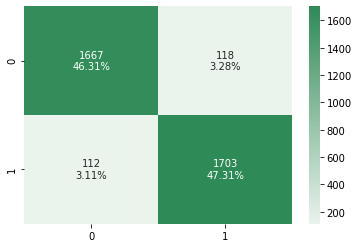

In [ ]:
clear_session()
wandb.init(project='fakenews_twitter_final', entity='sajadadgar')
config = wandb.config
config.vocab_size = 46000
config.maxlen = max_token
config.embedding_dims = 40
config.hidden_dims = 128
config.epochs = 100

model=Sequential()
model.add(Embedding(config.vocab_size,config.embedding_dims,input_length=config.maxlen))
model.add(Bidirectional(LSTM(config.hidden_dims)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

my_callbacks = [
    EarlyStopping(patience=10, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
    WandbCallback()
]

model.fit(X_train_final, y_train_final, validation_data=(X_test_final, y_test_final), epochs=config.epochs, batch_size=64, callbacks=my_callbacks)

wandb.finish()
best_model = tf.keras.models.load_model("./saved_models/checkpoints/best_model")
prediction = best_model.predict_classes(X_test_final)
accuracy = evaluate(y_test_final, prediction)
confusion_matrix_plot(confusion_matrix(y_test_final, prediction))

### Save the model

In [ ]:
filename = 'Bidirectional_LSTM128_0.2dropout.h5'
best_model.save('models/' + filename)

## Model 9. CNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            1840000   
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 96)           20100     
_________________________________________________________________
dropout (Dropout)            (None, 46, 96)           0         
_________________________________________________________________
global_max_pooling1d (Global (None, 96)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11   

225/225 [==============================] - ETA: 0s - loss: 0.4810 - accuracy: 0.7772WARNING:tensorflow:Model was constructed with shape (None, 50) for input KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 32).


225/225 [==============================] - 8s 34ms/step - loss: 0.4803 - accuracy: 0.7776 - val_loss: 0.1631 - val_accuracy: 0.9403

Epoch 00001: val_accuracy improved from -inf to 0.94028, saving model to ./saved_models/checkpoints/best_model
INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


Epoch 2/100
225/225 [==============================] - 8s 34ms/step - loss: 0.0923 - accuracy: 0.9648 - val_loss: 0.1517 - val_accuracy: 0.9386

Epoch 00002: val_accuracy did not improve from 0.94028
Epoch 3/100
225/225 [==============================] - 8s 34ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.1719 - val_accuracy: 0.9339

Epoch 00003: val_accuracy did not improve from 0.94028
Epoch 4/100
225/225 [==============================] - 8s 33ms/step - loss: 0.0118 - accuracy: 0.9971 - val_loss: 0.1985 - val_accuracy: 0.9317

Epoch 00004: val_accuracy did not improve from 0.94028
Epoch 5/100
225/225 [==============================] - 8s 34ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.2159 - val_accuracy: 0.9336

Epoch 00005: val_accuracy did not improve from 0.94028
Epoch 6/100
225/225 [==============================] - 8s 34ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.2342 - val_accuracy: 0.9339

Epoch 00006: val_accuracy did not improve from 0.94028


epoch,35
loss,0.00025
accuracy,0.99986
val_loss,0.40664
val_accuracy,0.92778
_runtime,272
_timestamp,1615570616
_step,35
best_val_loss,0.15169
best_epoch,1


epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆▇█████████████████████████████████
val_loss,▁▁▂▂▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▆▆▆▆▆▆▆▇▇▇▆▇▇▇█
val_accuracy,█▇▅▅▅▅▅▆▆▆▅▄▄▄▃▁▃▃▁▃▂▃▃▃▃▃▃▄▃▃▄▃▂▃▃▃
_runtime,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1785
           1       0.93      0.96      0.94      1815

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600

Accuracy score: 0.9402777777777778
Precision score: 0.9259850905218318
Recall score: 0.9581267217630854


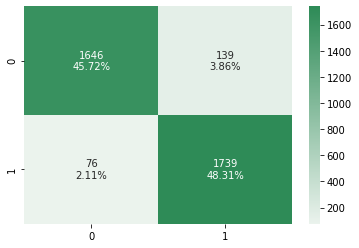

In [78]:
clear_session()
wandb.init(project='fakenews_twitter_final', entity='sajadadgar')
config = wandb.config
config.vocab_size = 46000
config.maxlen = 50
config.embedding_dims = 40
config.hidden_dims = 96
config.epochs = 100

model = Sequential()
model.add(Embedding(config.vocab_size,config.embedding_dims,input_length=config.maxlen))
model.add(Conv1D(config.hidden_dims, 5, activation='relu'))
# model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


my_callbacks = [
    EarlyStopping(patience=20, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
    WandbCallback()
]

model.fit(X_train_final, y_train_final, validation_data=(X_test_final,y_test_final), epochs=config.epochs, batch_size=64, callbacks=my_callbacks)

wandb.finish()
best_model = tf.keras.models.load_model("./saved_models/checkpoints/best_model")
prediction = best_model.predict_classes(X_test_final)
accuracy = evaluate(y_test_final, prediction)
confusion_matrix_plot(confusion_matrix(y_test_final, prediction))

### Save the model

In [ ]:
filename = 'CNN100.h5'
best_model.save('models/' + filename)

## Model 10. CNN + LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 40)            1840000   
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 96)           25728     
_________________________________________________________________
dropout (Dropout)            (None, 46, 96)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 23, 96)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 96)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 96)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)               0      

225/225 [==============================] - ETA: 0s - loss: 0.4259 - accuracy: 0.7753WARNING:tensorflow:Model was constructed with shape (None, 50) for input KerasTensor(type_spec=TensorSpec(shape=(None, 50), dtype=tf.float32, name='embedding_input'), name='embedding_input', description="created by layer 'embedding_input'"), but it was called on an input with incompatible shape (None, 32).


225/225 [==============================] - 19s 77ms/step - loss: 0.4253 - accuracy: 0.7757 - val_loss: 0.1753 - val_accuracy: 0.9300

Epoch 00001: val_accuracy improved from -inf to 0.93000, saving model to ./saved_models/checkpoints/best_model


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


Epoch 2/50
225/225 [==============================] - 17s 73ms/step - loss: 0.0824 - accuracy: 0.9713 - val_loss: 0.1679 - val_accuracy: 0.9344

Epoch 00002: val_accuracy improved from 0.93000 to 0.93444, saving model to ./saved_models/checkpoints/best_model


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


INFO:tensorflow:Assets written to: ./saved_models/checkpoints/best_model/assets


Epoch 3/50
225/225 [==============================] - 17s 74ms/step - loss: 0.0289 - accuracy: 0.9923 - val_loss: 0.2141 - val_accuracy: 0.9275

Epoch 00003: val_accuracy did not improve from 0.93444
Epoch 4/50
225/225 [==============================] - 16s 73ms/step - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.3012 - val_accuracy: 0.9239

Epoch 00004: val_accuracy did not improve from 0.93444
Epoch 5/50
225/225 [==============================] - 16s 72ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.3085 - val_accuracy: 0.9264

Epoch 00005: val_accuracy did not improve from 0.93444
Epoch 6/50
225/225 [==============================] - 16s 71ms/step - loss: 0.0081 - accuracy: 0.9974 - val_loss: 0.3501 - val_accuracy: 0.9264

Epoch 00006: val_accuracy did not improve from 0.93444
Epoch 7/50
225/225 [==============================] - 16s 72ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.3118 - val_accuracy: 0.9261

Epoch 00007: val_accuracy did not improve from 0.93444


epoch,43
loss,0.00039
accuracy,0.99986
val_loss,0.4762
val_accuracy,0.92444
_runtime,738
_timestamp,1615571395
_step,43
best_val_loss,0.1679
best_epoch,1


epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆▇█████████████████████████████████████
val_loss,▁▁▂▃▃▄▃▄▄▄▄▄▅▅▅▆▅▅▅▅▆▆▆▆▆▇▆▆▆▆▇▇█▅▄▄▅▅▅▆
val_accuracy,▆█▄▂▄▄▄▄▄▅▅▅▂▅▃▃▄▂▄▅▂▁▃▃▂▃▃▃▂▃▂▁▂▁▄▅▄▅▄▃
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1785
           1       0.95      0.92      0.93      1815

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600

Accuracy score: 0.9344444444444444
Precision score: 0.9462973431317129
Recall score: 0.9223140495867769


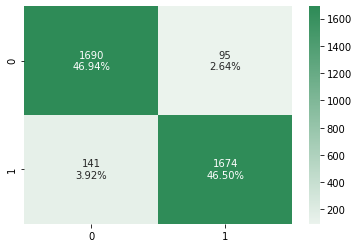

In [79]:
clear_session()
wandb.init(project='fakenews_twitter_final', entity='sajadadgar')
config = wandb.config
config.vocab_size = 46000
config.maxlen = 50
config.embedding_dims = 40
config.hidden_dims = 128
config.epochs = 50

model = Sequential()
model.add(Embedding(config.vocab_size,config.embedding_dims,input_length=config.maxlen))
model.add(Conv1D(128, 5, activation='relu'))
# model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(config.hidden_dims))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print(model.summary())

my_callbacks = [
    EarlyStopping(patience=20, monitor='val_accuracy', mode='min'),
    ModelCheckpoint("./saved_models/checkpoints/best_model", monitor='val_accuracy', verbose=1, save_best_only=True),
    WandbCallback()
]

model.fit(X_train_final, y_train_final, validation_data=(X_test_final,y_test_final), epochs=config.epochs, batch_size=64, callbacks=my_callbacks)

wandb.finish()
best_model = tf.keras.models.load_model("./saved_models/checkpoints/best_model")
prediction = best_model.predict_classes(X_test_final)
accuracy = evaluate(y_test_final, prediction)
confusion_matrix_plot(confusion_matrix(y_test_final, prediction))

### Save the model

In [80]:
filename = 'CNN128_lstm128.h5'
best_model.save('models/' + filename)

In [77]:
!rm -rf saved_models